In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
from arch.univariate import GARCH, ConstantMean, Normal


In [3]:
sp_df = pd.read_csv('SP500.csv')

# Drop rows with value '.'
df = sp_df.drop(sp_df[sp_df['SP500']== '.'].index)

In [4]:
values = df['SP500'].astype(float)
returns = (100*(np.log(values.shift()) - np.log(values)))[1:]
returns

1       2.628894
2      -1.092319
3       0.320833
4      -0.652414
5      -1.260744
          ...   
1301   -0.198784
1302   -0.967533
1303    0.198655
1304   -0.423072
1305    0.897295
Name: SP500, Length: 1258, dtype: float64

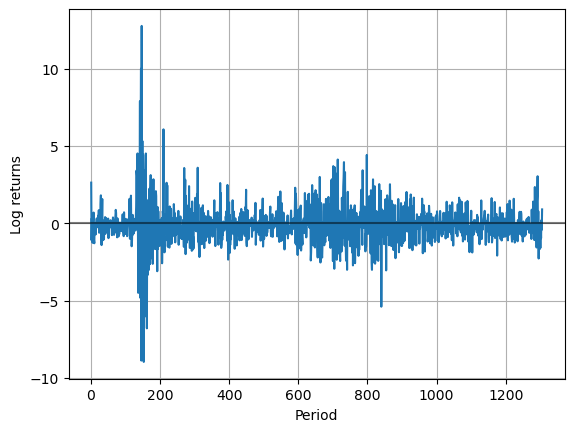

In [5]:
plt.plot(returns)

plt.axhline(0,0,1,color='black', alpha=0.5)

plt.ylabel('Log returns')
plt.xlabel('Period')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Correlation Coefficient')

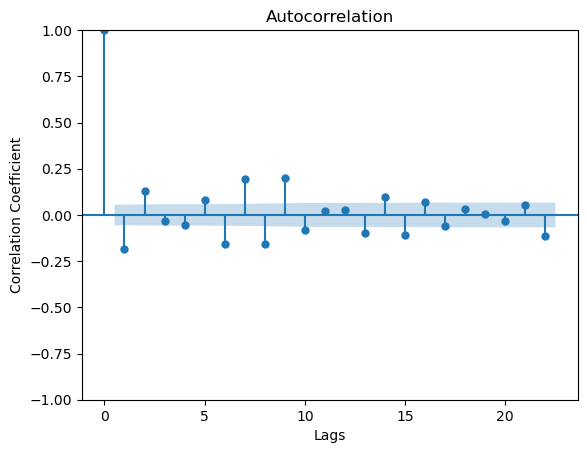

In [6]:
x = plot_acf(returns, lags=22)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')

Yes, there seems to be correlation with lag 1 and lag 2.

### b)

In [7]:
squared = returns**2

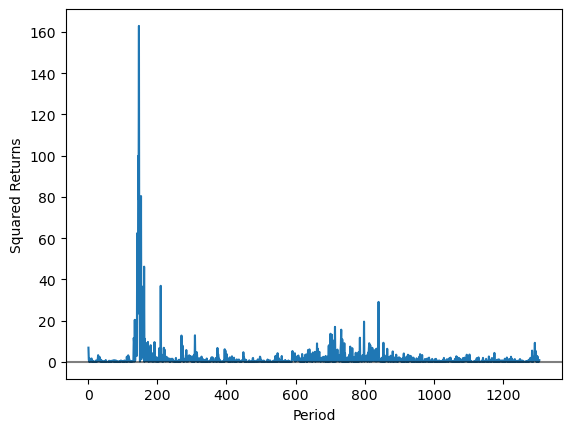

In [8]:
plt.plot(squared)
plt.xlabel('Period')
plt.ylabel('Squared Returns')
plt.axhline(0,0,1,color='black', alpha=0.5)

plt.show()

Text(0, 0.5, 'Correlation Coefficient')

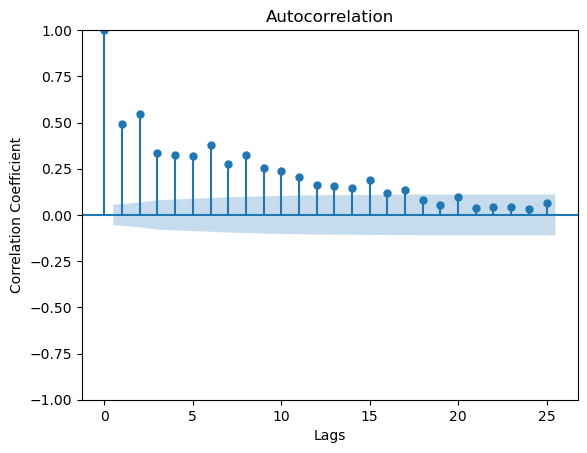

In [9]:
y = plot_acf(squared, lags=25)

plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')

Displays a much stronger sereial correlation, suggesting lags all the way through 15 has an effect.

### d)

In [11]:
values.pct_change()

0            NaN
1      -0.025946
2       0.010983
3      -0.003203
4       0.006545
          ...   
1301    0.001990
1302    0.009722
1303   -0.001985
1304    0.004240
1305   -0.008933
Name: SP500, Length: 1259, dtype: float64

In [18]:
r = (np.log(values).diff() * 100)[1:]
r

1      -2.628894
2       1.092319
3      -0.320833
4       0.652414
5       1.260744
          ...   
1301    0.198784
1302    0.967533
1303   -0.198655
1304    0.423072
1305   -0.897295
Name: SP500, Length: 1258, dtype: float64

In [24]:
model = arch_model(r)

In [25]:
model = ConstantMean(returns)
model.volatility = GARCH(1, 0, 1)
model.distribution = Normal()

In [28]:
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8137.142300785195
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5382.494221622408
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2759.6957434605506
Iteration:      4,   Func. Count:     33,   Neg. LLF: 5431.071870423661
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1804.6427280160503
Iteration:      6,   Func. Count:     45,   Neg. LLF: 1804.509938826484
Iteration:      7,   Func. Count:     50,   Neg. LLF: 1804.5045500266056
Iteration:      8,   Func. Count:     55,   Neg. LLF: 1804.5045200930617
Iteration:      9,   Func. Count:     60,   Neg. LLF: 1804.504518944947
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1804.5045189449884
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1804.504518944947
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10


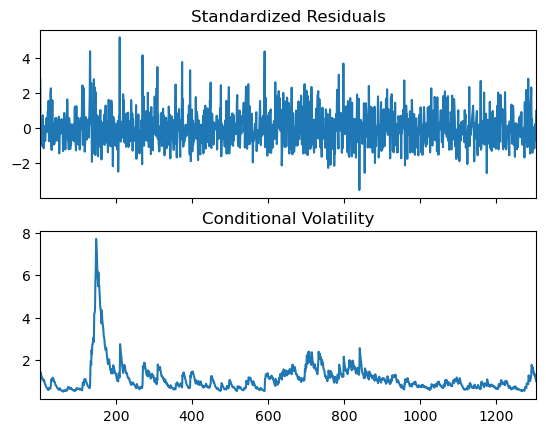

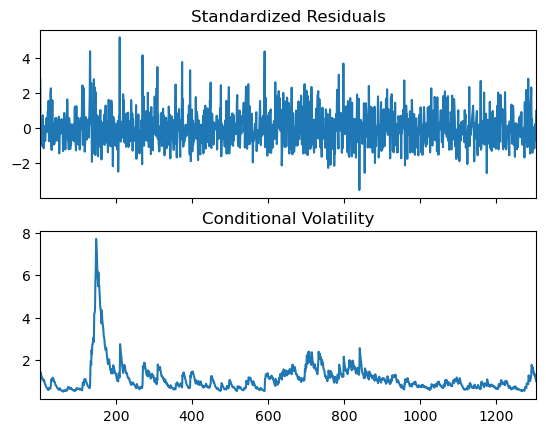

In [29]:
res.plot()